In this notebook, we will analyze the dataset titles "Welltory COVID-19 and Wearables Open Data Research". This dataset is part of a research carried out in 2020. 

The goal behind this dataset is to "detect patterns regarding the COVID-19 disease; progression and recovery"

The dataset, created by the Welltory team, was made available to the public on a non-commercial basis in an effort to fight the pandemic

Source: https://github.com/Welltory/hrv-covid19/tree/master?tab=readme-ov-file

In [200]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [201]:
#Configuring the output of pd so it doesn't truncate columns
pd.set_option('display.max_columns', None)
pd.set_option("expand_frame_repr", False)

# Initial Data Exploration & Assessment

### Data Lineage & Provenance

The dataset provided contains data of users with positive COVID-19 that agreed to participate in the research. The research involved tracking the users' (participants) symptomps, heart rate variability, and data, which involved using Welltory wearables that keep track of the different metrics, accessible through the Welltory app.

The data collected by the researchers involved: 
- "Heart rate variability measurements. Measurements were made with any Bluetooth-enabled heart rate monitor or with a smartphone camera with a high resolution - a method called Photoplethysmography (PPG). It is a simple optical technique used to detect blood volume changes in the microvascular bed of tissue to track the heartbeat. 

- Data from user-connected gadgets including devices such as Apple Watch and Garmin that sync with Google Fit or Apple Health.

- Clinically validated physical and mental health assessments. We created a feature specifically for this project, where people would add information about symptoms and test results." (Source: https://github.com/Welltory/hrv-covid19/tree/master?tab=readme-ov-file)

Since the main data that the research is based on is the HRV measurement, it is important to note that getting readings to estimate HRV have many factors that could influence PPG results such as the person's movements or hardware issues, which may raise questions about the data quality. 

The Welltory Team published a paper titled "Wavelet Analysis And Self-Similarity Of Photoplethysmography Signals For HRV Estimation And Quality Assessment", where they discuss their strategy to collect the data ensuring accurate readings, as well as documenting their signal processing process. To be specific, they introduced a new algorithm that does "not only detect peaks, but also identify corrupted signal parts. Their prepocessing procesure included specific steps to avoid signal issues such as "vanished signal and abrupt shift". Although the researchers seem to have taken appropriate steps to report the most accurate measurements, they mention that their algorithm demonstrates one limitation. In fact, they conclude that "the algorithm perform well on various PPG signals", but "cannot be used for HRV estimation from PPG signals collected during or right after exercise since [in which case] the PPG signal does not contain sufficient information". (Source: https://www.mdpi.com/1424-8220/21/20/6798#sec3dot1-sensors-21-06798)

The dataset is split among 9 different csv files namely: 
- participants.csv: containing general information about users (participants)
- hrv_measurements.csv: contains data based on heart rate variability (HRV) measurements collected from COVID-19 participants via the Welltory app
- blood_pressure.csv: Contains blood pressure data and derivatives. Fields functional_changes_index, circulatory_efficiency, kerdo_vegetation_index, robinson_index are calculated when heart rate data is available during measurement
- heart_rate.csv: contains raw heart rate intervals
- wearables.csv: Contains data collected from supported gadgets and aggregated by day
- sleep.csv: Contains data about user sleep collected from supported gadgets and aggregated by day
- weather.csv: Contains data about weather conditions for user's location aggregated by day
- surveys.csv: Contains results of health-related surveys that users take in Welltory app
- scales_description: Contains scales description, value, and meaning

To learn more about the columns in each file, please refer to the datatypes.md file provided by the researchers

# Data Profiling (EDA)

Profile the dataset to understand its characteristics (Done via EDA)

- Explore and interpret data structure, descriptive statistics, data quality, and variable - - relationships
    - Code and documented interpretation of data structure
    - Code and documented interpretation of descriptive statistics
    - Code and documented interpretation of data quality
    - Code and documented interpretation of variable relationships (and value distributions)
- Explore data visually with appropriate visualizations
    - Visualizations used are complete and appropriate and interpretation(s) are documented in the notebook
    - Visualizations follow best practices (titles, axes labels, etc)




In [202]:
df_blood_pressure = pd.read_csv("data/blood_pressure.csv")
print(df_blood_pressure.head())

    user_code  measurement_datetime  diastolic  systolic  functional_changes_index  circulatory_efficiency  kerdo_vegetation_index  robinson_index
0  01bad5a519  2020-04-29  22:33:33        100       150                       NaN                     NaN                     NaN             NaN
1  01bad5a519  2020-04-30  01:33:33        100       150                       NaN                     NaN                     NaN             NaN
2  01bad5a519  2020-04-30  09:16:38         95       140                      3.38                  4545.0                     6.0           141.4
3  01bad5a519  2020-04-30  12:16:38         95       140                       NaN                     NaN                     NaN             NaN
4  01bad5a519  2020-05-01  06:58:06         80       130                      2.89                  4000.0                     NaN           104.0


In [203]:
df_heart_rate = pd.read_csv("data/heart_rate.csv")
df_heart_rate.head()

,user_code,datetime,heart_rate,is_resting
0,007b8190cf,2020-04-26 04:49:25,70,0
1,01bad5a519,2020-04-23 06:21:03,74,0
2,01bad5a519,2020-04-23 09:46:01,82,0
3,01bad5a519,2020-04-23 14:05:06,90,0
4,01bad5a519,2020-04-24 03:41:18,72,0


In [204]:
df_hrv_measurements = pd.read_csv("data/hrv_measurements.csv")
df_hrv_measurements.head()

,user_code,rr_code,measurement_datetime,time_of_day,bpm,meanrr,mxdmn,sdnn,rmssd,pnn50,mode,amo,lf,hf,vlf,lfhf,total_power,how_feel,how_mood,how_sleep,tags,rr_data
0,007b8190cf,10489a6aea,2020-04-21 21:23:08,morning,75,795.90,0.12,45.802,54.174,15.15,0.775,53.0,508.0,1076.0,267.0,0.472,1851.0,0,-1,NaN,COVID-19; Workout; Sex; Hobby; Studying; Sleep; Smoking; Music; Morning; Day; Evening; Night; Hydrotherapy; Walk,"819,1008,831,847,785,778,866,839,801,793,846,856,800,791,816,847,822,790,783,800,811,754,767,813,823,793,782,830,852,801,761,660,837,1027,766,785,861,807,749,745,745,769,776,771,782,753,756,783,773,795,757,767,790,780,783,811,805,819,786,776,783,782,739,725,728,742,763,784,754,756,764,789,819,838,793,789,806,810,775,770,798,829,841,839,792,798,796,800,774,799,801,801,767,802,828,793,766,770,786,782"
1,007b8190cf,9610d4d4dc,2020-04-26 11:19:25,morning,70,858.00,0.11,32.889,33.022,16.16,0.875,54.0,409.0,310.0,176.0,1.319,895.0,0,0,0.0,NaN,"888,775,811,883,890,894,894,899,893,889,890,832,848,873,902,870,880,826,880,890,903,877,837,783,812,826,838,836,847,818,868,856,867,872,878,867,954,885,890,854,853,867,850,881,890,874,890,837,826,831,852,830,836,855,843,839,812,796,779,824,890,900,821,806,886,826,840,875,902,916,926,869,884,854,843,861,880,890,822,801,820,835,849,869,855,855,834,836,896,867,882,878,851,847,861,876,862,853,824,818"
2,013f6d3e5b,f3de056155,2020-05-15 04:14:21,night,83,724.10,0.17,54.811,65.987,17.17,0.725,46.0,432.0,881.0,194.0,0.490,1507.0,-1,-2,NaN,COVID-19; Fast/Diet; Hungry; Tired; Fever; I could do better; Illness; Period; Pregnancy; Coffee; Meal; Meeting,"694,832,642,801,751,716,737,742,773,760,701,732,773,780,765,733,705,775,786,783,712,653,655,644,656,606,1047,830,792,711,726,756,766,754,705,718,715,764,737,718,708,745,769,776,755,683,730,742,750,758,687,711,740,748,736,703,715,740,769,728,695,734,740,741,721,693,707,742,703,707,731,712,674,691,709,731,668,665,678,751,731,706,663,677,607,630,652,656,634,670,726,752,752,697,710,734,757,718,685,721"
3,013f6d3e5b,b04489e32f,2020-05-19 03:06:02,night,75,802.64,0.20,72.223,70.039,22.22,0.825,43.0,814.0,1487.0,1719.0,0.547,4020.0,0,0,NaN,NaN,"821,817,771,805,833,788,747,724,792,825,775,758,777,803,865,1183,1156,839,836,763,743,809,820,790,732,792,831,858,843,793,790,820,921,776,684,764,774,736,788,766,739,776,817,680,670,854,635,779,753,695,662,691,745,724,751,832,845,806,836,792,820,837,801,780,806,866,861,798,781,827,834,854,824,798,801,847,878,845,804,768,754,800,830,824,784,801,838,850,823,786,826,843,826,780,814,829,835,809,776,816"
4,01bad5a519,ac52c706c6,2019-12-31 09:07:43,morning,78,768.07,0.10,29.650,21.196,4.04,0.775,56.0,489.0,128.0,96.0,3.820,713.0,0,0,0.0,NaN,"741,740,734,737,740,731,751,747,745,728,747,763,769,775,807,713,737,719,705,698,707,733,765,816,811,805,795,789,780,747,728,726,721,719,716,752,783,807,818,798,781,767,759,760,750,734,728,745,787,775,787,788,780,786,786,784,768,736,734,748,768,778,799,790,749,791,796,797,787,779,809,758,813,831,813,788,783,794,798,800,782,758,767,781,791,807,801,781,791,770,779,786,774,749,760,772,780,798,777,756"


In [205]:
df_participants = pd.read_csv("data/participants.csv")
df_participants.head()

,user_code,gender,age_range,city,country,height,weight,symptoms_onset
0,007b8190cf,m,25-34,Mandalay,Myanmar,170.18,96.162,NaN
1,013f6d3e5b,f,18-24,São Paulo,Brazil,174.00,77.300,5/15/2020
2,01bad5a519,m,45-54,St Petersburg,Russia,178.00,92.000,4/5/2020
3,0210b20eea,f,25-34,Sochi,Russia,169.00,60.000,5/6/2020
4,024719e7da,f,45-54,St Petersburg,Russia,158.00,68.500,5/27/2020


In [206]:
df_scales_description = pd.read_csv("data/scales_description.csv")
df_scales_description.head()

,Scale,Description,Value,Meaning
0,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,1,Less than 3 days
1,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,2,3 to 6 days
2,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,3,7 to 14 days
3,S_COVID_SYMPTOMS,How long the user has been experiencing symptoms,4,More than 14 days
4,S_COVID_COUGH,Symptom intensity: Coughing,1,User isn’t experiencing symptom


In [207]:
df_sleep = pd.read_csv("data/sleep.csv")
df_sleep.head()

,user_code,day,sleep_begin,sleep_end,sleep_duration,sleep_awake_duration,sleep_rem_duration,sleep_light_duration,sleep_deep_duration,pulse_min,pulse_max,pulse_average
0,0d297d2410,2019-12-31,2019-12-31 07:50:32,2019-12-31 08:45:22,3290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0d297d2410,2020-01-01,2020-01-01 04:13:41,2020-01-01 09:45:02,19881.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d297d2410,2020-01-02,2020-01-02 02:14:52,2020-01-02 08:06:00,21068.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0d297d2410,2020-01-03,2020-01-03 00:10:00,2020-01-03 08:45:10,30910.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0d297d2410,2020-01-04,2020-01-04 01:27:25,2020-01-04 08:52:20,26695.0,NaN,NaN,21480.0,NaN,55.0,95.0,72.5


In [208]:
df_surveys = pd.read_csv("data/surveys.csv")
df_surveys.head()

,user_code,scale,created_at,value,text
0,01bad5a519,S_CORONA,2020-04-23,2,Symptoms are characteristic of coronavirus
1,01bad5a519,S_COVID_BLUISH,2020-04-23,1,User isn’t experiencing symptom
2,01bad5a519,S_COVID_BLUISH,2020-04-25,1,User isn’t experiencing symptom
3,01bad5a519,S_COVID_BLUISH,2020-04-27,1,User isn’t experiencing symptom
4,01bad5a519,S_COVID_BLUISH,2020-04-29,1,User isn’t experiencing symptom


In [209]:
df_wearables = pd.read_csv("data/wearables.csv")
df_wearables.head()

,user_code,day,resting_pulse,pulse_average,pulse_min,pulse_max,average_spo2_value,body_temperature_avg,stand_hours_total,steps_count,distance,steps_speed,total_number_of_flights_climbed,active_calories_burned,basal_calories_burned,total_calories_burned,average_headphone_exposure,average_environment_exposure
0,007b8190cf,2020-04-26,NaN,70.0,70.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2859.0,2859.0,NaN,NaN
1,01bad5a519,2020-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8574.0,NaN,57.90,NaN,NaN,2624.0,2624.0,NaN,NaN
2,01bad5a519,2020-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7462.0,NaN,59.10,NaN,NaN,2624.0,2624.0,NaN,NaN
3,01bad5a519,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507.0,NaN,60.97,NaN,NaN,2624.0,2624.0,NaN,NaN
4,01bad5a519,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10131.0,NaN,49.10,NaN,NaN,2624.0,2624.0,NaN,NaN


In [210]:
df_weather = pd.read_csv("data/weather.csv")
df_weather.head()

,user_code,day,avg_temperature_C,atmospheric_pressure,precip_intensity,humidity,clouds
0,013f6d3e5b,2020-05-22,18.0667,1017.6,0.0002,70.0,67.0
1,01bad5a519,2020-01-11,-1.2111,1016.4,0.0002,92.0,6.0
2,01bad5a519,2020-01-30,0.5056,1004.7,0.0009,85.0,100.0
3,01bad5a519,2020-04-02,-0.2444,994.4,0.0025,91.0,87.0
4,01bad5a519,2020-04-12,5.1778,1016.1,0.0000,61.0,91.0


Some of the steps taken in the EDA were inspired by Dr.Brinnae Bent's EDA code demo.

### Data Structure

In [211]:
df_list = [df_blood_pressure, df_heart_rate, df_hrv_measurements, df_participants, df_scales_description, df_sleep, df_surveys, df_wearables, df_weather]
df_list_names = ["df_blood_pressure", "df_heart_rate", "df_hrv_measurements", "df_participants", "df_scales_description", "df_sleep", "df_surveys", "df_wearables", "df_weather"]

In [212]:
#TODO: Include analysis for each table. 
#TODO: Ahmed does analysis for the odd csvs
#TODO: Tal does analysis for the even csvs

for i, df_name in enumerate(df_list_names):
    #Data Structure
    print(f"Data Structure for {df_name}")
    print("-"*10)
    print(f"Dimensions: {df_list[i].shape}")
    print(f"Data Types:\n{df_list[i].dtypes}")
    print(f"Missing Values:\n{df_list[i].isnull().sum()}")
    print(f"Unique observations:\n{df_list[i].nunique()}")
    print('\n')

Data Structure for df_blood_pressure
----------
Dimensions: (721, 8)
Data Types:
user_code                    object
measurement_datetime         object
diastolic                     int64
systolic                      int64
functional_changes_index    float64
circulatory_efficiency      float64
kerdo_vegetation_index      float64
robinson_index              float64
dtype: object
Missing Values:
user_code                     0
measurement_datetime          0
diastolic                     0
systolic                      0
functional_changes_index    422
circulatory_efficiency      422
kerdo_vegetation_index      438
robinson_index              422
dtype: int64
Unique observations:
user_code                    28
measurement_datetime        719
diastolic                    45
systolic                     55
functional_changes_index    110
circulatory_efficiency      230
kerdo_vegetation_index       77
robinson_index              253
dtype: int64


Data Structure for df_heart_rate
-------

### Interpretation

##### Blood Pressure
The blood pressure table contains 721 observations of users' (participants) blood pressure, with each observation having multiple features that relate to blood pressure measurements that take into account different factors (e.g functional_changes_indes is an assessment of how well the body can adapt to stresors. Take height, weight, and gender into account). **It is interesting to note that the height, weight, and gender are features of the participants table**.

The numerical features represent the blood pressure measurements (diastolic and systolic) as well as other measurements that assess how well the body react to stressors and the blood circulation efficiency among other things.  

The categorical features represent the user id and the day-time for when this observation was made. **It is important to note that these measurements are for 28 unique users, meaning that most of the observation are measurements taken at different time/day for the same user (participant)**

This table is not complete. 422 observations have missing values for functional_changes_index, circulatory_efficiency, or kerdo_vegetation_index, while 438 have missing values for the robinson_index. Deletion of these columns may be necessary since they are missing values for most of the observation.

#### HRV Measurements
The HRV table contains 3245 observations of users' (participants) HRV measurements. To be specific, these observation are for **185 unique users**

The numerical features represent the HRV measurements (heart rate during measurement, average time between each heartbeat in ms (meanrr), difference between highest and lowest cardio interval values in s (mxdmn), std of normal hearbeat intervals in ms (sdnn) etc...).

The categorical features represent the user id, the unique measurement id (rr_code: there are 3245 unique measurement ids corresponding to the total number of observations), the date and time of the measurement, tags (csv of single words, assigned by the user to describe their state during the measurement. Seems optional. Some users included a lot of words, while others didn't include any descriptive words), rr_data (intervals in ms b/w consecutive hearbeats as a csv). **Since we have the average rr, dropping the rr_data column may be a good option to consider**

The table seems complete, except for the features how_sleep (1779 missing values) and tags (1044 missing values). We may consider dropping the how_sleep column since +50% of observations don't have a value associated with it. Before dropping the tags column, we should consider compiling a list of tags for each of the 185 unique users as we may be able to fill in the gaps and get a better general overview of the user's mental/physical state as they reported it. 

#### Scales Description
The Scales Decription table contains 148 observations of different scales used to describe different states of the users' mental and physical being. Each scale is associated with a description, value denoting the intensity of the state the user is experiencing, and meaning to decipher the value associated with that scale. For example, the scale S_COVID_COUGH indicates a user experiencing coughing as a result of covid, where the values range from 1 (no cough) to 6(indicating extremely sever coughing)

The numerical features represent the value that corresponds to each scale (e.g intensity of the symptom experienced by the participant).

The categorical features represent the scale's name, description, and its meaning (given the associated value).

The table does not have any missing data, which is understandable since it represents the key to understand what the scales and their values mean when occuring in other tables. *We may only use this table to integrate the scale description in the Surveys table.*

#### Surveys
The surveys table contains 2259 observations of users' (participants) reporting their physical/mental state (e.g whether or not they have diabetes). This table represents the reporting of **111 unique participants**. The scale, value, and text features correspond to the Scale, Value, and Meaning in the Scales_description table. 

The numerical and categorical features are similar to the scales description table. The only difference is the categorical feature created_at, which indicated the date on which the reporting happened. **It is interesting to note that the date reporting here is different than other tables, in the sense that it only indicates the date and not time of the observation**

This table does not contain any missing values, and no imputation or deletion of rows is necessary. **However, deleting the value or text row might be necessary since they convey similar information given the scale (although the text column is more descriptive).**

#### Weather
The Weather table contains 1717 observations of weather conditions for users' (participants) locations aggregated by day. These observations are for **104 unique users**. 

The numerical features represent weather conditions such as the avg temperature in celsius for that day, atmospheric pressure, precipitation intensity (in pct), and clouds (coverage in pct).

The categorical features represent the user id and the day on which the observation was made. Only the date (and not time) was included since all these observations have been aggregated by day.

This table is complete, and no imputation or deletion of rows/columns is necessary.

### Descriptive Statistics

In [213]:
#Exclude the Scales Description table as discussed above 
try:
    del df_list[df_list_names.index('df_scales_description')]
    df_list_names.remove('df_scales_description')
except ValueError:
    print("Element already deleted from list")

In [214]:
#Descriptive Statistics for numeric features
for i, df_name in enumerate(df_list_names):
    print(f'\nDescriptive Statistics for {df_name}')
    print('-'*15)
    numeric_columns = df_list[i].select_dtypes(include=[np.number]).columns
    print('Central Tendency Measures:')
    print(df_list[i][numeric_columns].describe().loc[['mean', '50%']])
    print('\nDispersion Measures:')
    print(df_list[i][numeric_columns].describe().loc[['std', 'min', 'max']])

    #Check for distribution normality (skewness and kurtosis)
    print('\nDistribution Measures:')
    print('-'*15)
    print(df_list[i][numeric_columns].skew())
    print(df_list[i][numeric_columns].kurtosis())
    print('\n')
    


Descriptive Statistics for df_blood_pressure
---------------
Central Tendency Measures:
      diastolic    systolic  functional_changes_index  circulatory_efficiency  kerdo_vegetation_index  robinson_index
mean  81.228849  119.441054                  2.594013             2735.197057              -15.498233       84.663779
50%   82.000000  120.000000                  2.580000             2640.000000              -17.000000       83.220000

Dispersion Measures:
      diastolic    systolic  functional_changes_index  circulatory_efficiency  kerdo_vegetation_index  robinson_index
std    8.865761   10.522578                  0.291302               747.88257               18.681233       14.399208
min   25.000000   63.000000                  1.680000              1300.00000              -76.000000       49.500000
max  101.000000  157.000000                  3.510000              7875.00000               45.000000      164.850000

Distribution Measures:
---------------
diastolic              

### Interpretation

#### Blood Pressure 
- Most of our numerical values have means and medians relatively close to each other, indicating a roughly symmetric distribution (e.g diastolic mean is 81.228849 and median is 82)

- It is interesting to note the value range of the circulatory efficiency here, where the min 1300 and max value is 7875. *It might be interesting to investigate the existence of a relationship between the fluctuation of the circulatory efficiency with covid symptoms

- Our means and medians for all features are close in value, indicating a roughly summetric distribution. However, it is interesting to note the skewness values for diastolic, for instance, indicating a left skewed distribution. SImilarly, circulatory_efficiency is right skewed (positive skewness value indicating right skew). None of the features have a normal distribution of values given their kurtosis value.

#### HRV Measurements
- Close to half of the numerical features have means and medians relatively close to each other, indicating a roughly symmetric distribution. However, by checking the skewness value, we can see that almost all of the features have a right skewed distribution. Only 3 features, namely how_feel, how_mood, and how_sleep have a symmetrical distribution. Most of the features do not have a normal distribution given the kurtosis value

- It is interesting to note tha the mean of how_feel and how_mood features (answers to "How do you feel physically?" in the post-measurement survey, and answers to "How is your mood?" in the post-measurement survey respectively) is negative, indicating that on average most of the 185 participants had a bad mood and were not feeling great physically

#### Surveys

- Most features in this table are categorical. However, it is interesting to note how the values of the mean (2.364763) and median (2.0). Since the scales are sometimes boolean, the mean and median of the value feature do not provide interesting insights. *It would be interesting to see the mean and median for the 'negative' scales (i.e non boolean scales indicating the presence of symptom )*

#### Weather
- The mean and values of almost all features are close in value (except for precipitation intensity) indicating a roughly symmetrical distribution. It is interesting to note the min and max values (-14C and 44C respectively) for the average temperature feature. Since the std is around 7 degrees celsius, this might indicate some extreme values in the data that might cause skewness. 

=> We might need to normalize most of the numerical features in order to ensure that different scales contribute equally to any model that might be built for this dataset.

### Data Quality

- Checking for duplicated rows or inconsistent values
- Checking for outliers or extreme values that need attention
- Checking if the values make sense based on the context and domain knowledge

In [215]:
#Data Quality
for i, df_name in enumerate(df_list_names):
    print(f'\nData Quality for {df_name}')
    print('-'*15)
    print(f'Duplicated Rows: {df_list[i].duplicated().sum()}')
    print('Checking for Inconsistent Values:')
    print(df_list[i].apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_values'))


Data Quality for df_blood_pressure
---------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                          most_frequent_values
user_code                           a1c2e6b2eb
measurement_datetime      2020-05-11  00:27:56
diastolic                                   80
systolic                                   122
functional_changes_index                  2.56
circulatory_efficiency                  2160.0
kerdo_vegetation_index                   -32.0
robinson_index                            73.2

Data Quality for df_heart_rate
---------------
Duplicated Rows: 0
Checking for Inconsistent Values:
           most_frequent_values
user_code            35c7355282
datetime    2020-05-10 13:00:00
heart_rate                   78
is_resting                    0

Data Quality for df_hrv_measurements
---------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                                                                                                        

- It is interesting to note how across all tables, the most frequent measurement days are really close, given us insights on when most of the data was collected (May 2020)
- There are no duplicated rows across all of the tables
- It is interesting to note how most survey obsertvations had a user not experiencing the symptom, indicating that most participants did not experience covid symptoms
- By checking the most frequent value for every feature across our tables, we were able to confirm that there are no outliers or extreme values that need our attention

### Variable Relationships


Variable Relationships in df_blood_pressure
---------------
Correlation Matrix


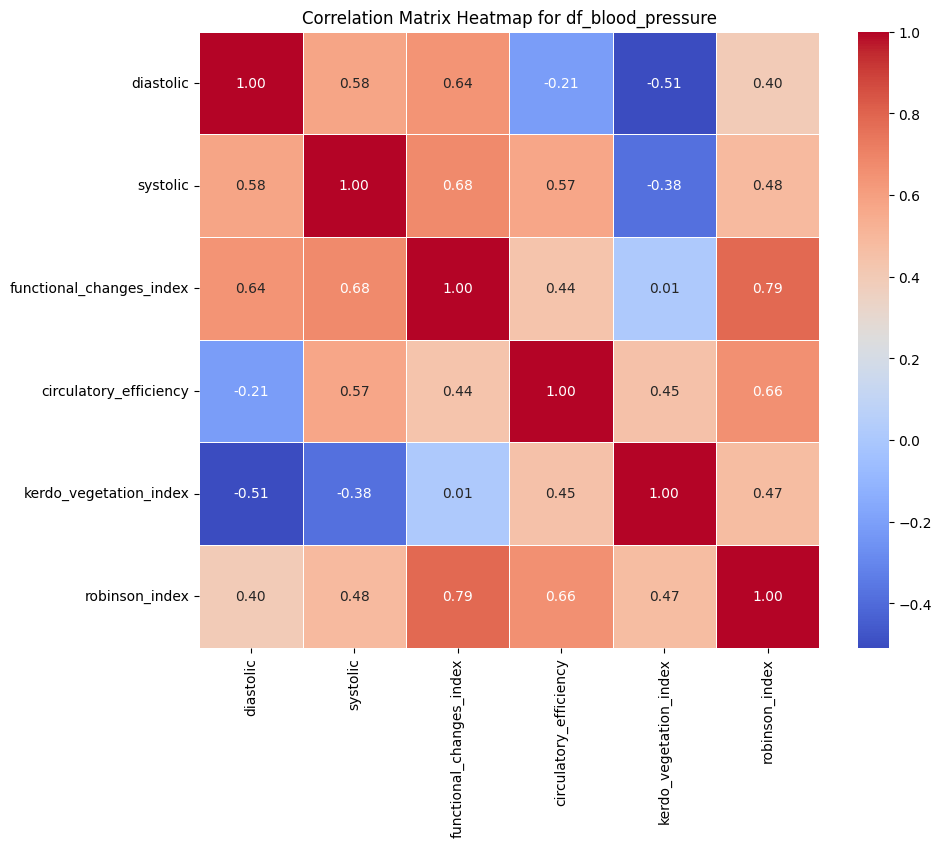


Variable Relationships in df_heart_rate
---------------
Correlation Matrix


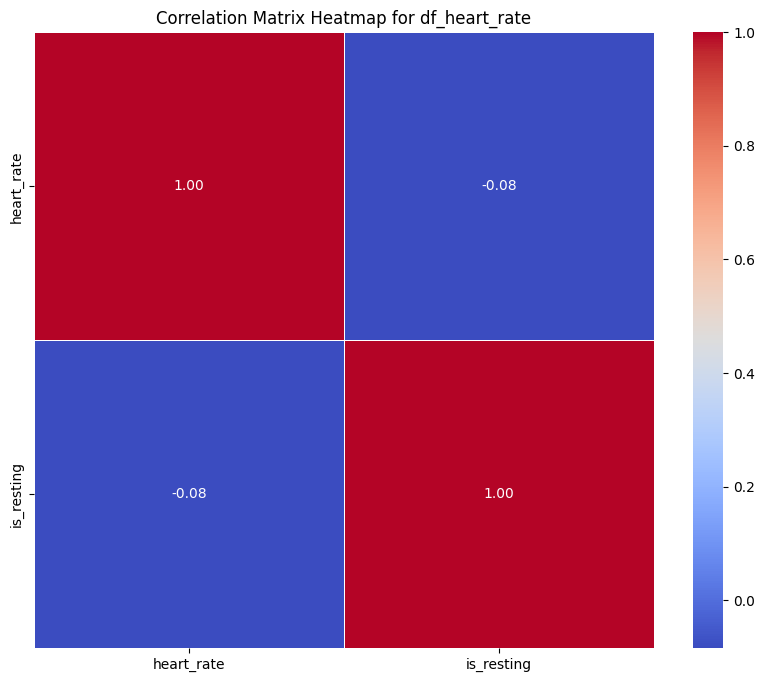


Variable Relationships in df_hrv_measurements
---------------
Correlation Matrix


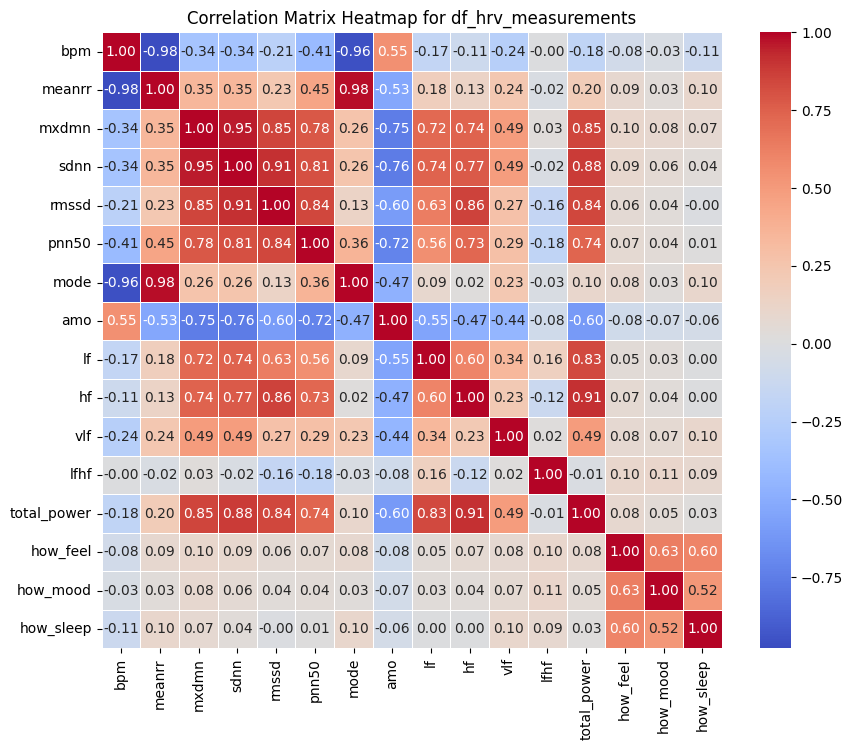


Variable Relationships in df_participants
---------------
Correlation Matrix


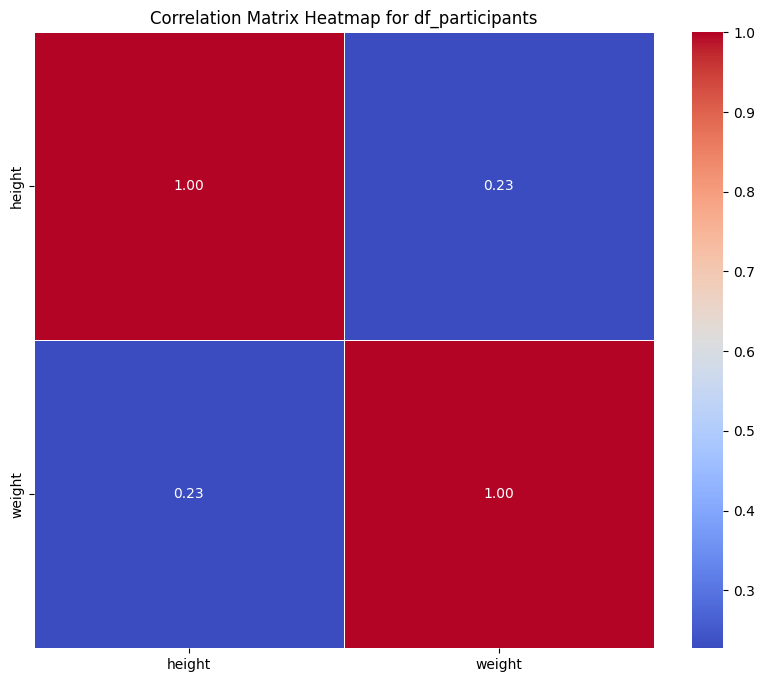


Variable Relationships in df_sleep
---------------
Correlation Matrix


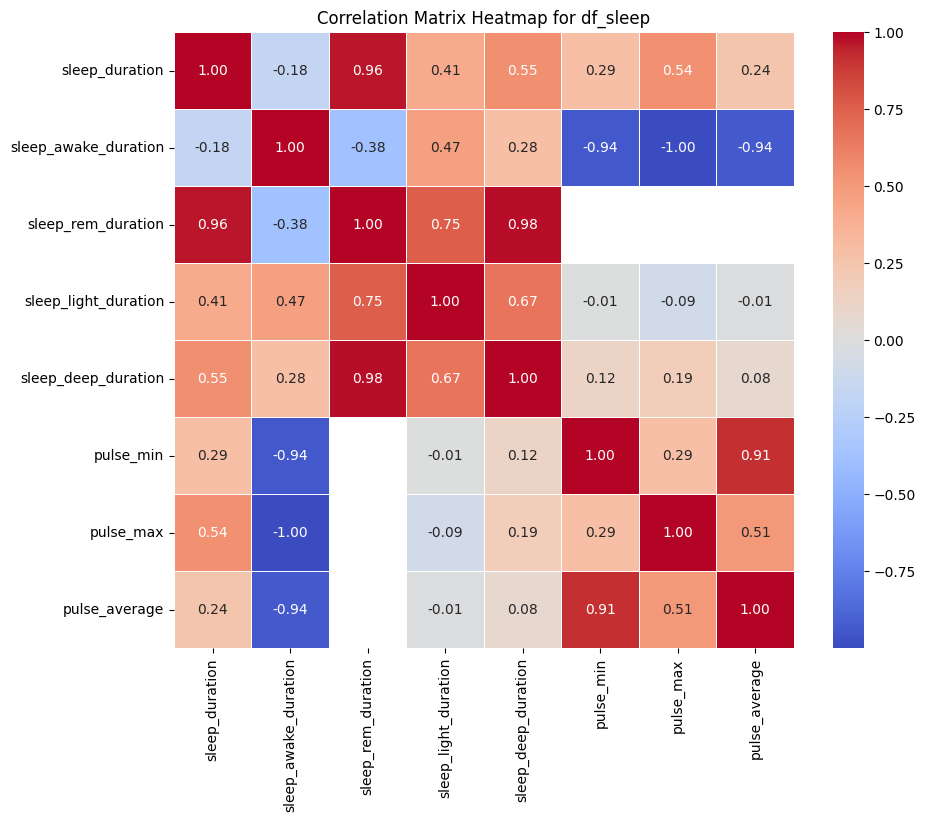


Variable Relationships in df_wearables
---------------
Correlation Matrix


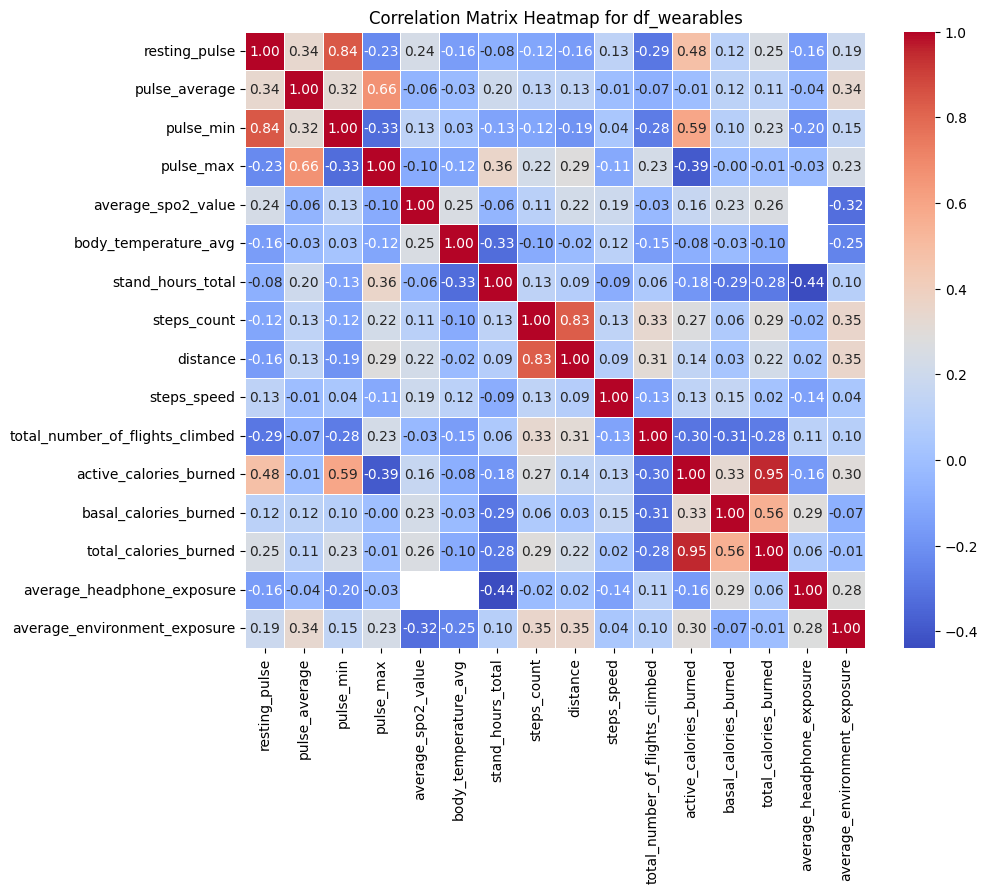


Variable Relationships in df_weather
---------------
Correlation Matrix


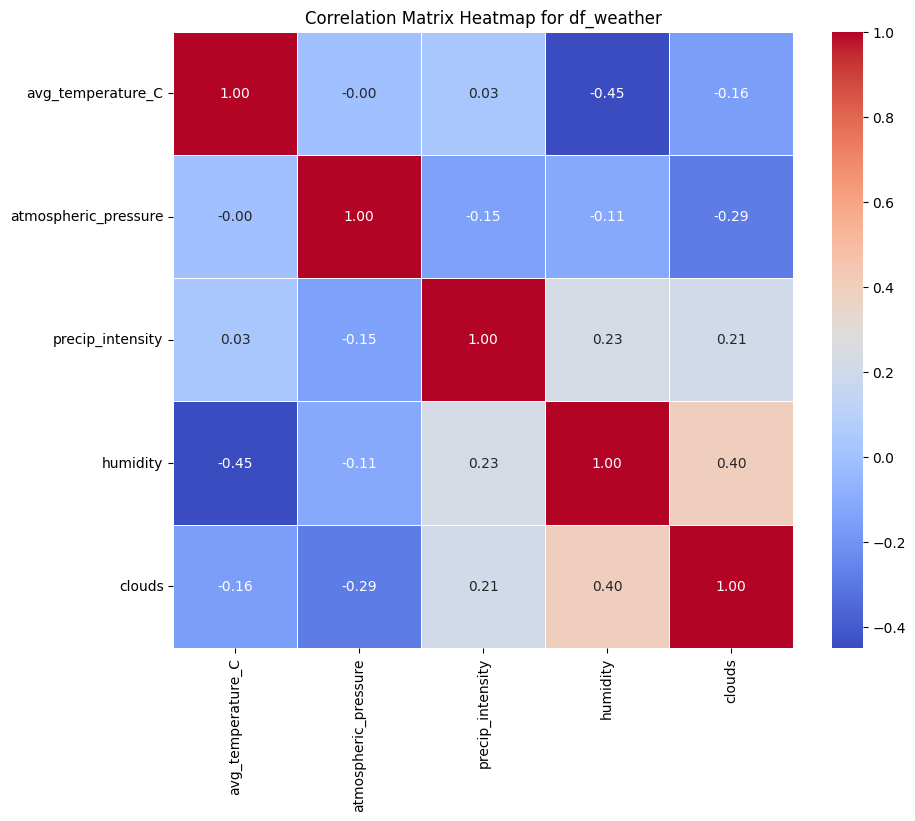

In [216]:
#Variable Relationships 
#Exclude the surveys table as well since it only has one numeric value
for i, df_name in enumerate(df_list_names):
    if (df_name!='df_surveys'):
        numeric_columns = df_list[i].select_dtypes(include=[np.number]).columns
        print(f'\nVariable Relationships in {df_name}')
        print('-'*15)
        print('Correlation Matrix')
        correlation_matrix = df_list[i][numeric_columns].corr()

        #Visualize Heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
        plt.title(f'Correlation Matrix Heatmap for {df_name}')
        plt.show()

### Interpretation

#### Blood Pressure
- It is interesting to see how the functional_changes_index (assessment of how well the body can adapt to stressors)and the robinson_index (the capacity of the cardiovascular system based on systolic blood pressure) are positively correlated variables, indicating that the capacity of the cardiovascular system increases as the body adapts better to stressors (vice-versa)
- It is also interesting to see how the kerdo_vegetation_index (balance between stress and recovery based on blood pressure) and the diastolic blood pressure are negatively correlated, indicating the one's balance between stress and recovery worsens as the blood pressure increases.

#### HRV Measurements
- The positive correlation between mxdmn (difference b/w highest and lowest cardio interval values), dnn, rmssd (root mean square of successive differences for consecutive intervals), and pnn50 (percent of RR-intervals that fall outside a 50 ms range of the average) since they all depend on the value of the cardio interval values (hearbeat interval). *This correlation indicates that creating a derived feature or interaction term combining all these features is a decision to explore*
- The negative correlation between bpm and meanrr is also expected since one is a measurements of beats per minute and the other is a measurement of the mean time between each heartbeat. *We should drop one of the features during our feature selection*
- The meanrr and the mode also represent similar measurements. *We should drop one of the features during the selection*
It is interesting to see how the how_feel and how_mood are positively correlated, which makes sense to some extent. Not feeling great physically will affect the person's mood. *It might interesting to explore combining both of these features* 

### Data Visualization

In [217]:
df_list = [df_blood_pressure, df_heart_rate, df_hrv_measurements, df_participants, df_sleep, df_surveys, df_wearables, df_weather]
df_list_names = ["df_blood_pressure", "df_heart_rate", "df_hrv_measurements", "df_participants", "df_sleep", "df_surveys", "df_wearables", "df_weather"]

In [218]:
def scale_data(df, scaler):
    return scaler.fit_transform(df)

In [234]:
#Visualize distributions for numerical features for each table
def visualize_dist_for_num_features(df, df_name):
    df.hist(bins=25, figsize=(10,10), grid=False)
    plt.suptitle(f'Histograms of Numeric Features of {df_name}', y=0.93)
    plt.show()

#Box plots to identify outliers
def visualize_outliers(df, df_name, numeric_columns):
    #Box plots to identify outliers
   
    #scaling the data for better plotting
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[numeric_columns])
    plt.figure(figsize=(15,10))
    sns.boxplot(data=df_scaled)
    plt.title(f'Box Plots of Numeric Features of {df_name}')
    plt.xlabel('Feature')
    plt.ylabel('Value')
    plt.xticks(range(0, len(numeric_columns)), numeric_columns.to_list(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### Blood Pressure

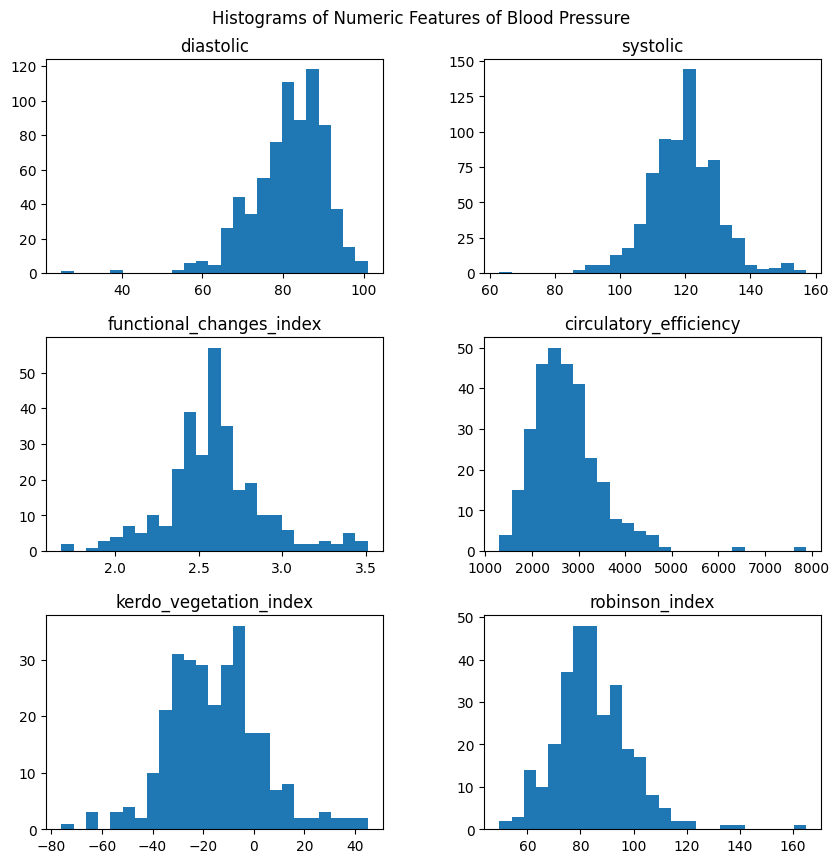

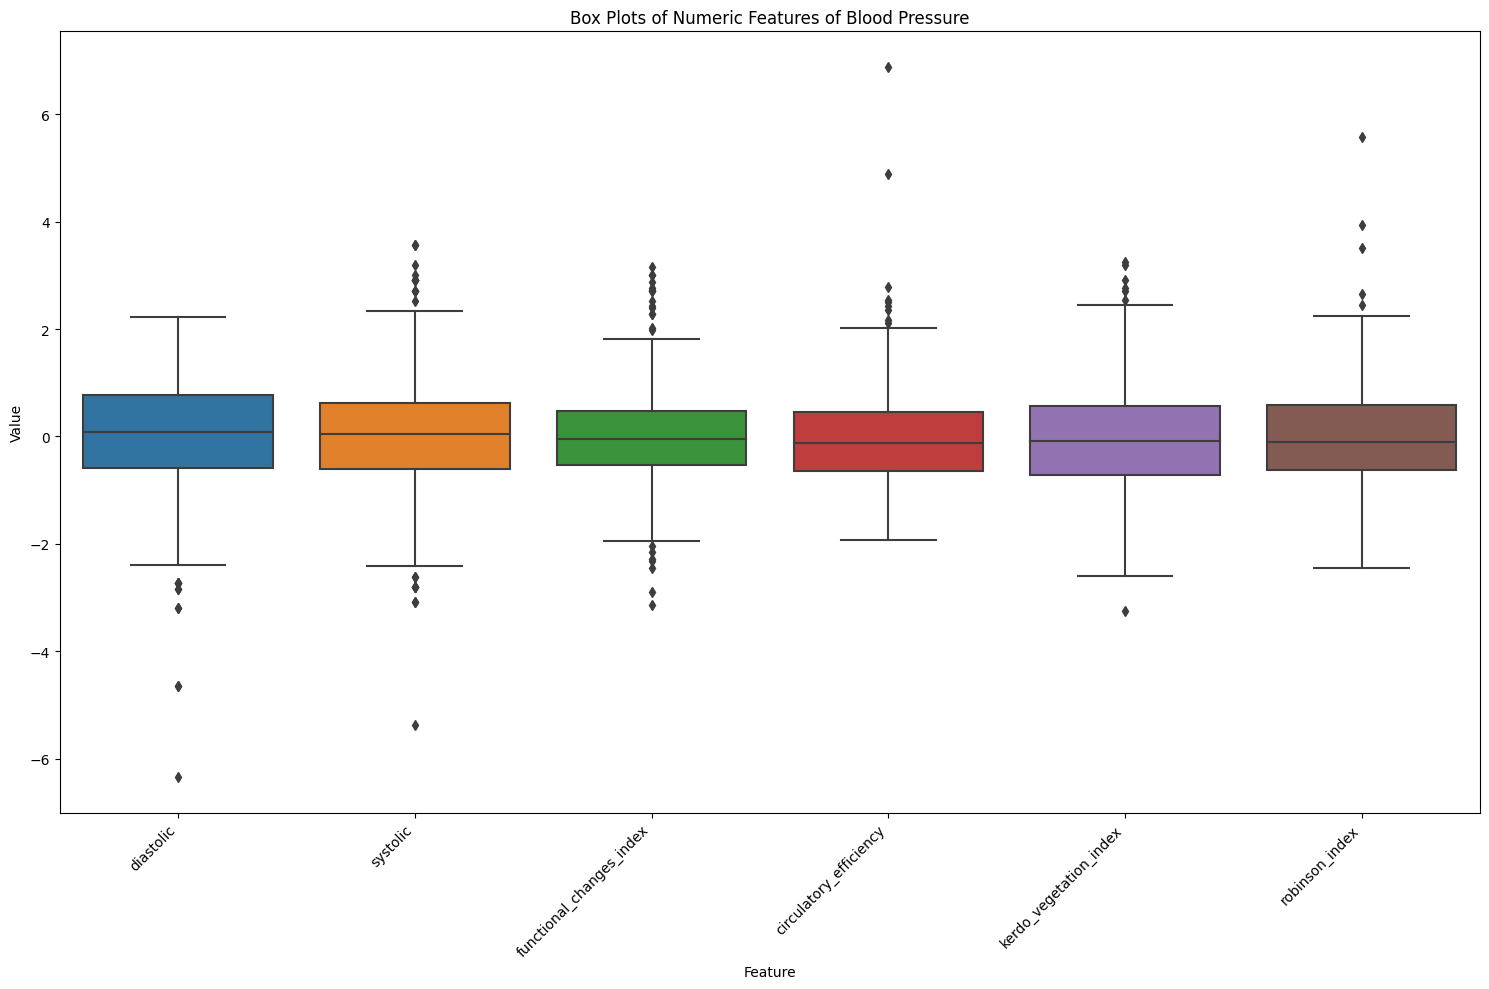

In [235]:
numeric_columns = df_blood_pressure.select_dtypes(include=[np.number]).columns

visualize_dist_for_num_features(df_blood_pressure[numeric_columns], 'Blood Pressure')
visualize_outliers(df_blood_pressure, 'Blood Pressure', numeric_columns)


- There are few individual histograms in circulatory_efficiency, indicating two  extremely small distinct groups within the data, likely corresponding to some outliers or extreme values that were reported only a few times, as maybe a hardware malfunction. This same observation applies to all the other features. We can confirm this observation by looking at the box plot which plots the outliers. *We need to either remove these outliers and try to understand why they are occuring*.
- Some of these outliers clearly represent extreme values that can be removed from the data. As for the other outliers, depending on their count, we may just replace that value with the average value for that feature
- Some of our features like, circulatory_efficiency, are somewhat symmetric. However, most of our features distributions are skewed, requiring transformation, to normalize it.

#### HRV Measurements

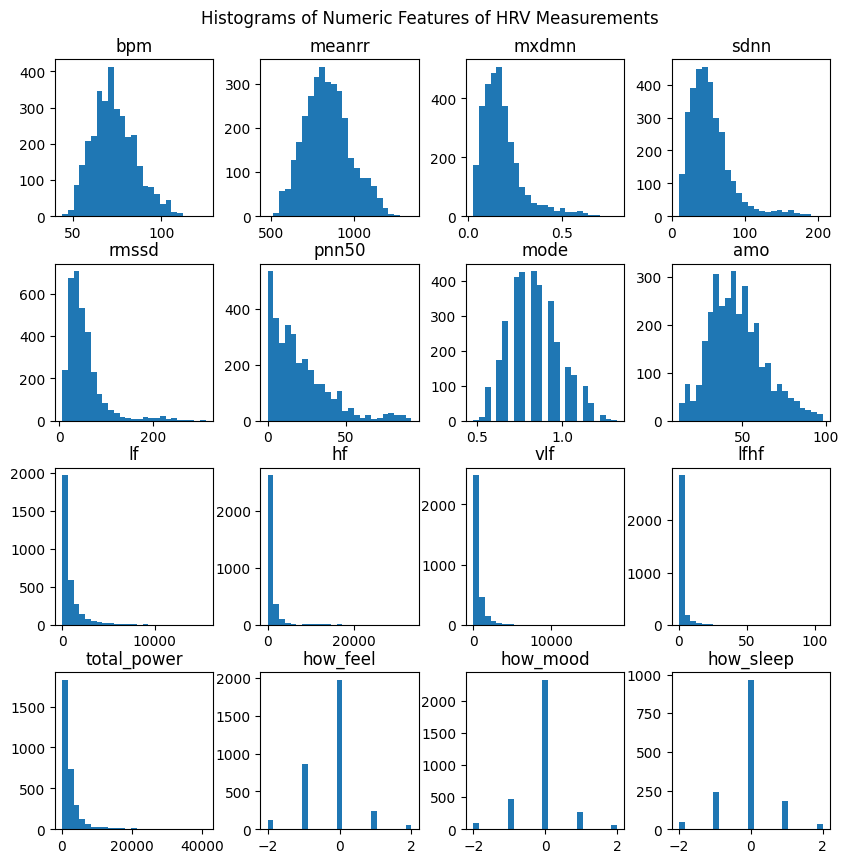

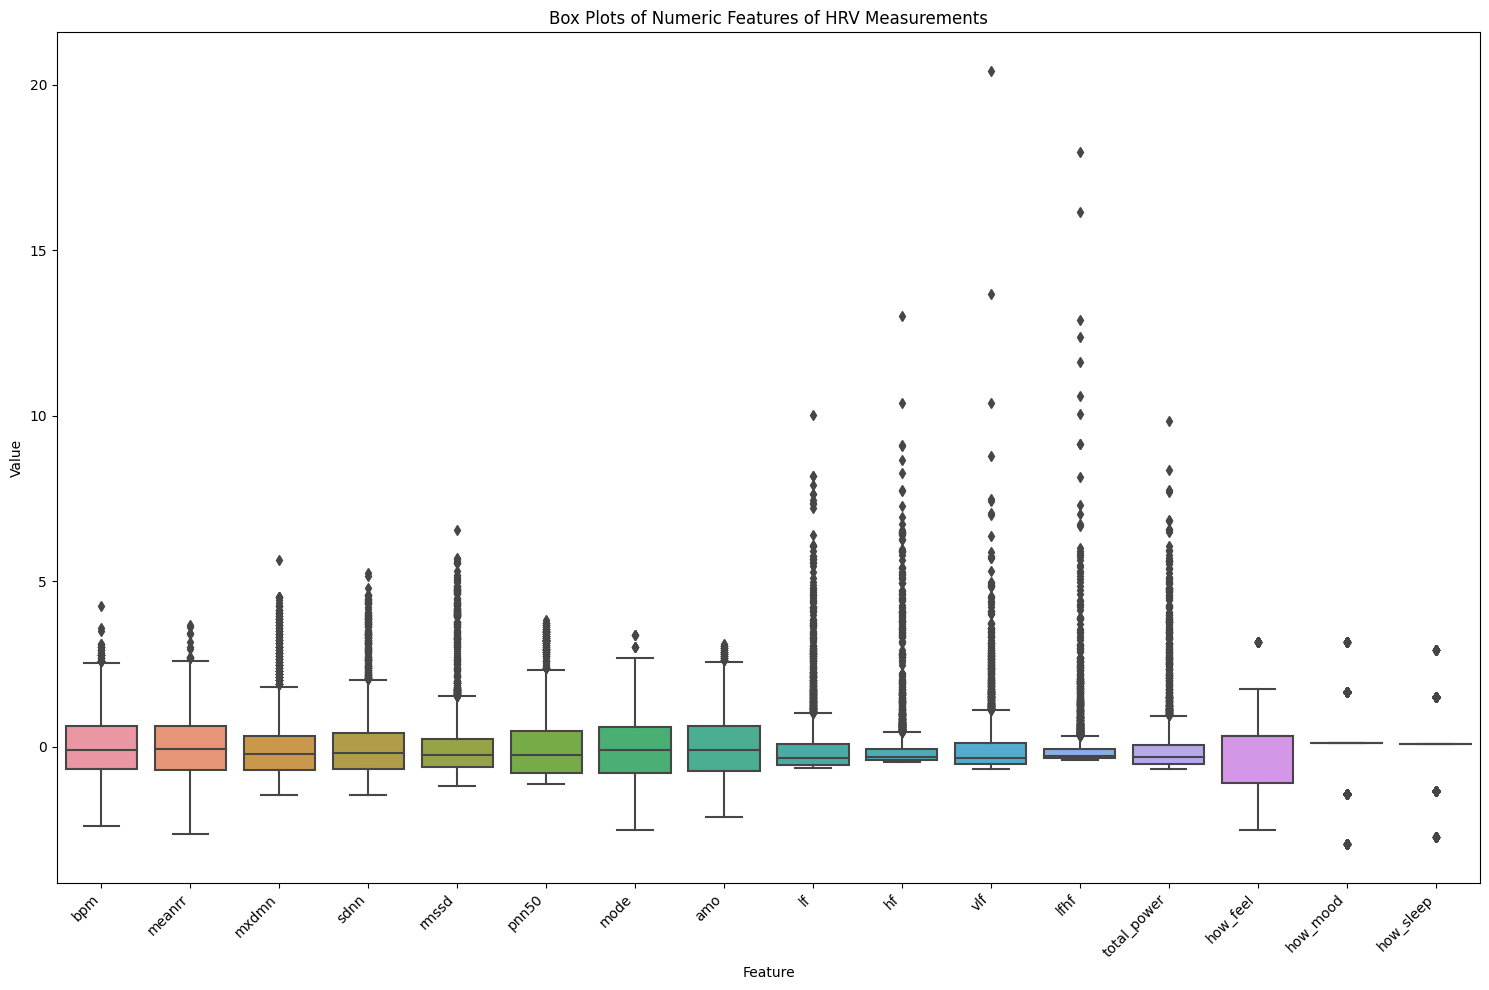

In [236]:
numeric_columns = df_hrv_measurements.select_dtypes(include=[np.number]).columns
visualize_dist_for_num_features(df_hrv_measurements[numeric_columns], 'HRV Measurements')
visualize_outliers(df_hrv_measurements, 'HRV Measurements', numeric_columns)

- Data has a quite a few outliers that can be categorized as extreme values. 
- Some features have symmetrical distributions, but non have a normal distribution. *We will need to normalize the data*

### Data Accuracy

We can safely assume that the data is accurate given the different steps taken by the researchers to ensure accuracy. We cannot cross check it against other sources since this data is proprietary. 

### Data Consistency

The data is mostly consistent across all sources. It is important to note how some tables keep track of the date followed by time, while others only include the date measurement.

It is also important to note how some people is the participants table have entered their birthdate in the symptom_onset column (The onset date of the symptoms of the disease. The format is MM/DD/YYYY.). *We will need to manually remove these participants from all tables*

Ensure consistency across sources, formats, and time periods

### Data Integrity

Enforce data constraints such as unique UIDs, valid value ranges etc..

# Data Preprocessing

### Data Cleaning

- Handle missing values (drop some of the columns you said you were gonna drop and fill in averages if needed)
- Remove dups (we are good here)
- Handle outliers (use the plots and remove the outliers

### Data Integration

Integrate multiple sources of data together (ensuring consistent formatting)

### Data Transformation

- Normalization/standardization
    - Handling skewed data via log transformation
- Feature Engineering and Encoding 
    - Create at least one new feature and document your approach
        - Will prolly need to plote how that affected the dataset
    - Perform a dimensionality reduction method on the data and discuss 

### Handling imbalanced data